## Ordinary Differential Equations (ODEs)

In [2]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time
from scipy.integrate import odeint

In [3]:
## Example problem: Circular orbit in magnetic field

def B(t, x):
    return x[1]**2*np.array([0., 0., 1.])
    #return np.array([0., 0., 1.])

def f(t, y, z):
    return z

def g(t, y, z):
    q = 1
    m = 1
    return q*np.cross(z, B(t, y))/m

def forwardEuler(h, t, y, z, f, g):
    k1 = f(t, y, z)
    l1 = g(t, y, z)
    y_new = y + h*k1
    z_new = z + h*l1
    return y_new, z_new

def rungeKutta(h, t, y, z, f, g):
    k1 = f(t, y, z)
    l1 = g(t, y, z)
    k2 = f(t + h/2, y+h*k1/2, z+h*l1/2)
    l2 = g(t + h/2, y+h*k1/2, z+h*l1/2)
    k3 = f(t + h/2, y+h*k2/2, z+h*l2/2)
    l3 = g(t + h/2, y+h*k2/2, z+h*l2/2)
    k4 = f(t + h,   y+h*k3,   z+h*l3)
    l4 = g(t + h,   y+h*k3,   z+h*l3)
    y_new = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    z_new = z + h*(l1 + 2*l2 + 2*l3 + l4)/6
    return y_new, z_new

def stepper(h, t, x, v, f, g, integrator):
    # Step once, with stepsize h
    x1, v1 = integrator(h, t, x, v, f, g)
    # Step twice, with stepsize h/2
    x2, v2 = integrator(h/2, t, x, v, f, g)
    x2, v2 = integrator(h/2, t, x2, v2, f, g)
    # calculate error
    
    err = np.linalg.norm(x2-x1)/np.linalg.norm(x2)
    # Return x2, v2, which are presumable more accurate
    return x2, v2, err

def variableIntegrate(Tmax, h0, tol, integrator):
    T  = []
    X  = []
    V  = []
    # Initial values
    x  = np.array([0., 1., 0.])
    v  = np.array([1., 0., 0.])
    # Mapping to new variables, y and z:
    # y = x
    # z = v
    
    # Start at time 0, with initial guess of stepsize
    t = 0
    h = h0
    while t < Tmax:
        T.append(t)
        flag = True
        while flag:
            x1, v1, err = stepper(h, t, x, v, f, g, integrator)
            if err > tol:
                h = h/2
            else:
                t += h
                h = 1.5*h
                x = x1
                v = v1
                flag = False
        X.append(x)
        V.append(v)
    T = np.array(T)
    X = np.array(X)
    V = np.array(V)
    return T, X, V
    
Tmax = 12*np.pi
h0   = 1e-1

RK_times = []
RK_steps = []
FE_times = []
FE_steps = []

tolerances = np.logspace(-3, -8, 31)
for tol in tolerances:
    print(tol)
    tic = time()
    Tr, Xr, Vr = variableIntegrate(Tmax, h0, tol, rungeKutta)
    toc = time()
    RK_times.append(toc - tic)
    RK_steps.append(2*len(Tr))
    tic = time()
    Te, Xe, Ve = variableIntegrate(Tmax, h0, tol, forwardEuler)
    toc = time()
    FE_times.append(toc - tic)
    FE_steps.append(2*len(Te))


0.001
0.000681292069058
0.000464158883361
0.000316227766017
0.000215443469003
0.000146779926762
0.0001
6.81292069058e-05
4.64158883361e-05
3.16227766017e-05
2.15443469003e-05
1.46779926762e-05
1e-05
6.81292069058e-06
4.64158883361e-06
3.16227766017e-06
2.15443469003e-06
1.46779926762e-06
1e-06
6.81292069058e-07
4.64158883361e-07
3.16227766017e-07
2.15443469003e-07
1.46779926762e-07
1e-07
6.81292069058e-08
4.64158883361e-08
3.16227766017e-08
2.15443469003e-08
1.46779926762e-08
1e-08


/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


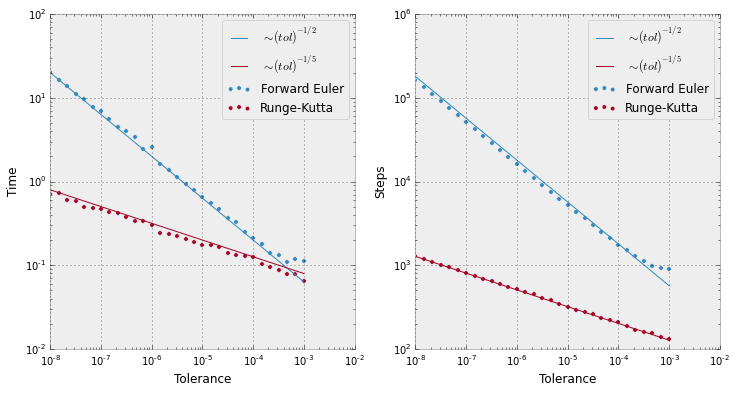

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

l, = ax[0].plot(tolerances, tolerances**-0.5/500, lw = 1, label = '$\sim(tol)^{-1/2}$')
ax[0].scatter(tolerances, FE_times, label = 'Forward Euler', c = l.get_color())
l, = ax[0].plot(tolerances, tolerances**-0.2/50, lw = 1, label = '$\sim(tol)^{-1/5}$')
ax[0].scatter(tolerances, RK_times, label = 'Runge-Kutta', c = l.get_color())
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Tolerance')
ax[0].set_ylabel('Time')
ax[0].legend()

l, = ax[1].plot(tolerances, 18*tolerances**-0.5, lw = 1, label = '$\sim(tol)^{-1/2}$')
ax[1].scatter(tolerances, FE_steps, label = 'Forward Euler', c = l.get_color())
l, = ax[1].plot(tolerances, 32*tolerances**-0.2, lw = 1, label = '$\sim(tol)^{-1/5}$')
ax[1].scatter(tolerances, RK_steps, label = 'Runge-Kutta', c = l.get_color())
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Tolerance')
ax[1].set_ylabel('Steps')
ax[1].legend()